In [ ]:
import os
import random
import json
import paddle
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Define common variables

#name dictionary
name_dict = {"apple": 0, "banana": 1, "grape": 2,
             "orange": 3, "pear": 4}

# dataset path
data_root_path = "fruits/"

# test path
test_file_path = data_root_path + "test.txt" 

#train path
train_file_path = data_root_path + "train.txt"
#Record each category image key: name value: path list
name_data_list = {} 

# Add the image to the dictionary
def save_train_test_file(path, name): 
    # if fruit is not in the dictionary
    if name not in name_data_list: 
        img_list = []
        img_list.append(path) # save the path into list
        name_data_list[name] = img_list # save the name into dictionary
    #else add directly to the list
    else:
        name_data_list[name].append(path) 

# Walk through each subdirectory and put the image path into the dictionary
dirs = os.listdir(data_root_path) # Lists the subdirectories under the dataset
for d in dirs:
    full_path = data_root_path + d # full path of directory
    if os.path.isdir(full_path): # If it's a directory
        imgs = os.listdir(full_path) # list pic under directory
        for img in imgs:
            img_full_path = full_path + "/" + img # pic path
            save_train_test_file(img_full_path, d) # use save_train_test_file to add to dictionary
    else: # not a directory
        pass

# set up training and testing data
with open(test_file_path, "w") as f:
    pass
with open(train_file_path, "w") as f:
    pass

# walk through dictionary
for name, img_list in name_data_list.items():
    i = 0
    num = len(img_list) # get the number
    print("%s: %dpics" % (name, num))

    for img in img_list:
        #2lines in 1
        line = "%s\t%d\n" % (img, name_dict[name])
        if i % 10 == 0: #every no.10, 20,...will be the test set
            with open(test_file_path, "a") as f:
                f.write(line) # save to test.txt
        else: # others be the training set
            with open(train_file_path, "a") as f:
                f.write(line) # save to train.txt
        i += 1
print("data has been already writen into files.")

In [ ]:
import os
import random
import json
import paddle
import sys
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


# Define common variables

#name dictionary
name_dict = {"apple": 0, "banana": 1, "grape": 2,
             "orange": 3, "pear": 4}

# dataset path
data_root_path = "fruits/"

# test path
test_file_path = data_root_path + "test.txt" 

#train path
train_file_path = data_root_path + "train.txt"
#Record each category image key: name value: path list
name_data_list = {} 

# Add the image to the dictionary
def save_train_test_file(path, name): 
    # if fruit is not in the dictionary
    if name not in name_data_list: 
        img_list = []
        img_list.append(path) # save the path into list
        name_data_list[name] = img_list # save the name into dictionary
    #else add directly to the list
    else:
        name_data_list[name].append(path) 

# Walk through each subdirectory and put the image path into the dictionary
dirs = os.listdir(data_root_path) # Lists the subdirectories under the dataset
for d in dirs:
    full_path = data_root_path + d # full path of directory
    if os.path.isdir(full_path): # If it's a directory
        imgs = os.listdir(full_path) # list pic under directory
        for img in imgs:
            img_full_path = full_path + "/" + img # pic path
            save_train_test_file(img_full_path, d) # use save_train_test_file to add to dictionary
    else: # not a directory
        pass

# set up training and testing data
with open(test_file_path, "w") as f:
    pass
with open(train_file_path, "w") as f:
    pass

# walk through dictionary
for name, img_list in name_data_list.items():
    i = 0
    num = len(img_list) # get the number
    print("%s: %dpics" % (name, num))

    for img in img_list:
        #2lines in 1
        line = "%s\t%d\n" % (img, name_dict[name])
        if i % 10 == 0: #every no.10, 20,...will be the test set
            with open(test_file_path, "a") as f:
                f.write(line) # save to test.txt
        else: # others be the training set
            with open(train_file_path, "a") as f:
                f.write(line) # save to train.txt
        i += 1
print("data has been already writen into files.")

In [ ]:
from paddle.io import Dataset

class dataset(Dataset):
    def __init__(self, data_path, mode='train'):
        """
        Data Loader
        :param data_path: path
        :param mode: train or eval
        """
        super().__init__()
        self.data_path = data_path
        self.img_paths = []
        self.labels = []

        if mode == 'train':
            with open(os.path.join(self.data_path, "train.txt"), "r", encoding="utf-8") as f:
                self.info = f.readlines()
            for img_info in self.info:
                img_path, label = img_info.strip().split('\t')
                self.img_paths.append(img_path)
                self.labels.append(int(label))

        else:
            with open(os.path.join(self.data_path, "test.txt"), "r", encoding="utf-8") as f:
                self.info = f.readlines()
            for img_info in self.info:
                img_path, label = img_info.strip().split('\t')
                self.img_paths.append(img_path)
                self.labels.append(int(label))


    def __getitem__(self, index):
        """
        Get a data
        :param index: File Index
        :return:
        """

        img_path = self.img_paths[index]
        img = Image.open(img_path)
        if img.mode != 'RGB':
            img = img.convert('RGB') 
        img = img.resize((224, 224), Image.BILINEAR)
        #img = rand_flip_image(img)
        img = np.array(img).astype('float32')
        img = img.transpose((2, 0, 1)) / 255
        label = self.labels[index]
        label = np.array([label], dtype="int64")
        return img, label

    def print_sample(self, index: int = 0):
        print("File name", self.img_paths[index], "\tLabel name", self.labels[index])

    def __len__(self):
        return len(self.img_paths)

In [ ]:
#load training data
train_dataset = dataset('fruits',mode='train')
train_loader = paddle.io.DataLoader(train_dataset, batch_size=32, shuffle=True)
#load evaluate data
eval_dataset = dataset('fruits',mode='eval')
eval_loader = paddle.io.DataLoader(eval_dataset, batch_size = 8, shuffle=False)

print("Data Preprocessing is over")

In [ ]:
# CNN
class ConvPool(paddle.nn.Layer):
    def __init__(self,
                 num_channels,
                 num_filters, 
                 filter_size,
                 pool_size,
                 pool_stride,
                 groups,
                 conv_stride=1, 
                 conv_padding=1,
                 ):
        super(ConvPool, self).__init__()  

        # groups=number of c layer
        for i in range(groups):
            self.add_sublayer(   
                'bb_%d' % i,
                paddle.nn.Conv2D(         # layer
                in_channels=num_channels, #path
                out_channels=num_filters,   #filter number
                kernel_size=filter_size,   #filter size
                stride=conv_stride,        #c_stride
                padding = conv_padding,    #padding
                )
            )
            self.add_sublayer(
                'relu%d' % i,
                paddle.nn.ReLU()
            )
            num_channels = num_filters
            

        self.add_sublayer(
            'Maxpool',
            paddle.nn.MaxPool2D(
            kernel_size=pool_size,           #pooling layer size
            stride=pool_stride               #p_stride
            )
        )

    def forward(self, inputs):
        x = inputs
        for prefix, sub_layer in self.named_children():
            # print(prefix,sub_layer)
            x = sub_layer(x)
        return x

In [ ]:
# VGGNet
class VGGNet(paddle.nn.Layer):
    def __init__(self):
        super(VGGNet, self).__init__()       
        # 5Con
        self.convpool01 = ConvPool(
            3, 64, 3, 2, 2, 2)  
            #3:channel，64：Convolution kernel number, 3: the convolution kernel size, 
            #2: pooling nuclear size, 2: pooling step length, 2: continuous convolution number
        self.convpool02 = ConvPool(
            64, 128, 3, 2, 2, 2)
        self.convpool03 = ConvPool(
            128, 256, 3, 2, 2, 3) 
        self.convpool04 = ConvPool(
            256, 512, 3, 2, 2, 3)
        self.convpool05 = ConvPool(
            512, 512, 3, 2, 2, 3)       
        self.pool_5_shape = 512 * 7* 7
        # 3 FC
        self.fc01 = paddle.nn.Linear(self.pool_5_shape, 4096)
        self.drop1 = paddle.nn.Dropout(p=0.5)
        self.fc02 = paddle.nn.Linear(4096, 4096)
        self.drop2 = paddle.nn.Dropout(p=0.5)
        self.fc03 = paddle.nn.Linear(4096, train_parameters['class_dim'])

    def forward(self, inputs, label=None):
        # print('input_shape:', inputs.shape) #[8, 3, 224, 224]
        """Forward"""
        out = self.convpool01(inputs)
        # print('convpool01_shape:', out.shape)           #[8, 64, 112, 112]
        out = self.convpool02(out)
        # print('convpool02_shape:', out.shape)           #[8, 128, 56, 56]
        out = self.convpool03(out)
        # print('convpool03_shape:', out.shape)           #[8, 256, 28, 28]
        out = self.convpool04(out)
        # print('convpool04_shape:', out.shape)           #[8, 512, 14, 14]
        out = self.convpool05(out)
        # print('convpool05_shape:', out.shape)           #[8, 512, 7, 7]         

        out = paddle.reshape(out, shape=[-1, 512*7*7])
        out = self.fc01(out)
        out = self.drop1(out)
        out = self.fc02(out)
        out = self.drop2(out)
        out = self.fc03(out)
        
        if label is not None:
            acc = paddle.metric.accuracy(input=out, label=label)
            return out, acc
        else:
            return out


Training parameters

In [ ]:
train_parameters = {
    "train_list_path": "fruits/train.txt",       #train.txt path
    "eval_list_path": "fruits/test.txt",         #eval.txtpath
    "class_dim": 5,                              #Class number
}
# 
train_parameters.update({
    "input_size": [3, 224, 224],                              #size of input imag
    "num_epochs": 35,                                         #training epoch
    "skip_steps": 10,                                         #output skips
    "save_steps": 100,                                        #model save steps
    "learning_strategy": {                                    #learning rate
        "lr": 0.0001                                       
    },
    "checkpoints": "models/checkpoints"          #save path
})


In [ ]:
model = VGGNet()
model.train()
# loss function
cross_entropy = paddle.nn.CrossEntropyLoss()
# parameter optimizer
optimizer = paddle.optimizer.Adam(learning_rate=train_parameters['learning_strategy']['lr'],
                                  parameters=model.parameters()) 
                                  
steps = 0
Iters, total_loss, total_acc = [], [], []

for epo in range(train_parameters['num_epochs']):
    for _, data in enumerate(train_loader()):
        steps += 1
        x_data = data[0]
        y_data = data[1]
        predicts, acc = model(x_data, y_data)
        loss = cross_entropy(predicts, y_data)
        loss.backward()
        optimizer.step()
        optimizer.clear_grad()
        if steps % train_parameters["skip_steps"] == 0:
            Iters.append(steps)
            total_loss.append(loss.numpy()[0])
            total_acc.append(acc.numpy()[0])
            #print
            print('epoch: {}, step: {}, loss is: {}, acc is: {}'\
                  .format(epo, steps, loss.numpy(), acc.numpy()))
        #save
        if steps % train_parameters["save_steps"] == 0:
            save_path = train_parameters["checkpoints"]+"/"+"save_dir_" + str(steps) + '.pdparams'
            print('save model to: ' + save_path)
            paddle.save(model.state_dict(),save_path)
            
paddle.save(model.state_dict(),train_parameters["checkpoints"]+"/"+"save_dir_final.pdparams")


In [ ]:
def draw_process(title,color,iters,data,label):
    plt.title(title, fontsize=24)
    plt.xlabel("iter", fontsize=20)
    plt.ylabel(label, fontsize=20)
    plt.plot(iters, data,color=color,label=label) 
    plt.legend()
    plt.grid()
    plt.show()
draw_process("trainning loss","red",Iters,total_loss,"trainning loss")
draw_process("trainning acc","green",Iters,total_acc,"trainning acc")


In [ ]:
model__state_dict = paddle.load('.\\model\\checkpoints\\save_dir_final.pdparams') # last 
model_eval = VGGNet()
model_eval.set_state_dict(model__state_dict) 
model_eval.eval()
accs = []
# detect
for _, data in enumerate(eval_loader()):
    x_data = data[0]
    y_data = data[1]
    predicts = model_eval(x_data)
    acc = paddle.metric.accuracy(predicts, y_data)
    accs.append(acc.numpy()[0])
print('Accuracy of model：',np.mean(accs))



In [ ]:
def load_image(img_path):
    img = Image.open(img_path) 
    if img.mode != 'RGB': 
        img = img.convert('RGB') 
    img = img.resize((224, 224), Image.BILINEAR)
    img = np.array(img).astype('float32') 
    img = img.transpose((2, 0, 1)) / 255 # 
    return img
label_dic = {0:"apple", 1:"banana", 2:"grape",
             3:"orange", 4:"pear"}


C:\Users\76922\AppData\Local\Temp\ipykernel_17980\1004253889.py:5: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  img = img.resize((224, 224), Image.BILINEAR)


Sample: apple.png, is predicted as:apple


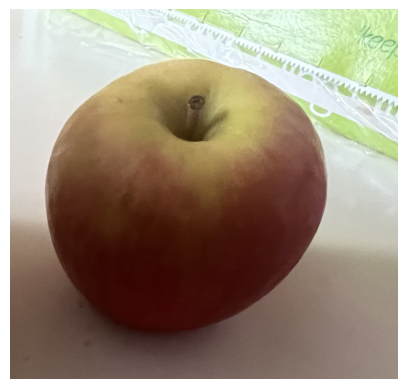

Sample: banana.png, is predicted as:banana


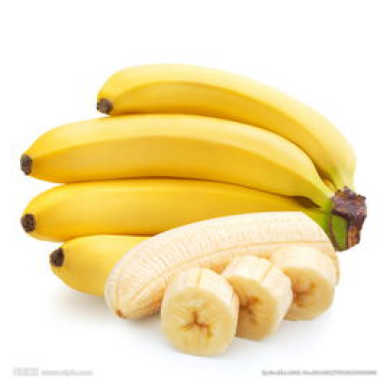

Sample: grape.png, is predicted as:grape


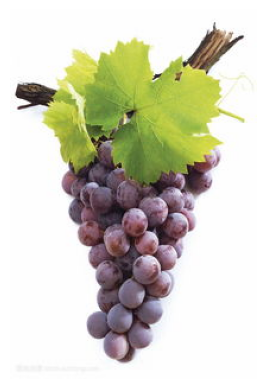

Sample: orange.png, is predicted as:orange


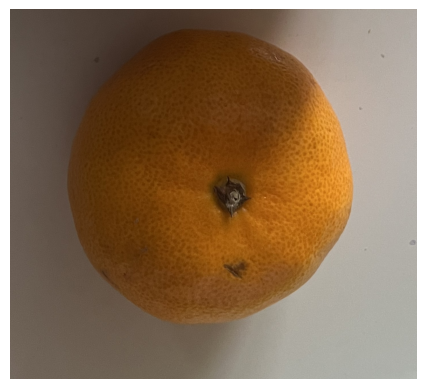

Sample: pear.png, is predicted as:pear


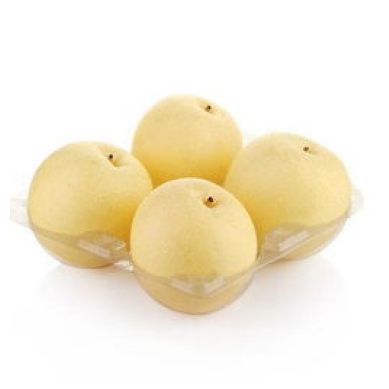

In [29]:
import time
# load model
model__state_dict = paddle.load('.\\model\\checkpoints\\save_dir_final.pdparams')
model_predict = VGGNet()
model_predict.set_state_dict(model__state_dict) 
model_predict.eval()
infer_imgs_path = os.listdir("predict")

# start detect
for infer_img_path in infer_imgs_path:
    infer_img = load_image("predict/"+infer_img_path)
    infer_img = infer_img[np.newaxis,:, : ,:]  #reshape(-1,3,224,224)
    infer_img = paddle.to_tensor(infer_img)
    result = model_predict(infer_img)
    lab = np.argmax(result.numpy())
    # print(lab)
    print("Sample: {}, is predicted as:{}".format(infer_img_path,label_dic[lab]))
    img = Image.open("predict/"+infer_img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    sys.stdout.flush()
    time.sleep(0.5)
